In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import copy
import pandas as pd

from scipy.ndimage import laplace
from scipy.stats import entropy

In [ ]:
# replicative mutations with on-site interactions
def derivative_replicative(c, r):
    
    c_growth = r
    r_death = c
    
    rhs_c = D*laplace(c_growth*c, mode='wrap') + (c_growth - 1)*c
    rhs_r = nu*((1-r) - alpha*(r_death-r))*r

    return rhs_c, rhs_r

# exogenous mutations with on-site interactions
def derivative_exogenous(c, r):
    
    c_growth = r
    r_death = c
    
    rhs_c = D*laplace(c, mode='wrap') + (c_growth - 1)*c
    rhs_r = nu*((1-r) - alpha*(r_death-r))*r

    return rhs_c, rhs_r

In [3]:
# params

# box size
L=200

# space discretization
N=200 
dx=L/N

# time
T=100

# space discretization
dt=0.0001
n_steps=int(T/dt)

# diffusion constant
D=10
# consumer relaxation rate
alpha = 0.95
# resource relaxation rate
nu = 10


## Replicative mutations

In [251]:
# integrate replicative equations

c = 2*np.random.rand(N, N)
r = 2*np.random.rand(N, N)

cs_rep = [copy.deepcopy(c)]
rs_rep = [copy.deepcopy(r)]

for n in range(n_steps):
    
    dcdt, drdt = derivative_replicative(c, r)
    c += dt*dcdt
    r += dt*drdt
    if n%10000==0:
        cs_rep.append(copy.deepcopy(c))
        rs_rep.append(copy.deepcopy(r))

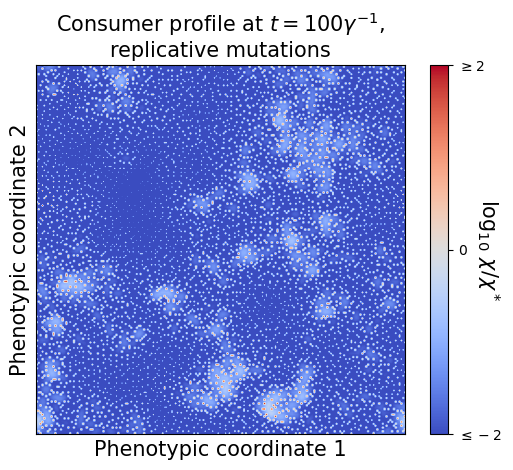

In [324]:
# plot consumer profile

data = np.log10(cs_non[-1])
plt.imshow(data, interpolation='bilinear', vmin=-2, vmax=2, cmap='coolwarm')

ax = plt.gca()
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

cbar = plt.colorbar(ticks=[-2, 0, 2])
cbar.ax.set_yticklabels(['$\\leq -2$', '0', '$\\geq 2$'])
cbar.set_label('log$_{10}$ ${\\chi}/{\\chi^*}$', rotation=270, fontsize=15, labelpad=1)

ax.set_xlabel('Phenotypic coordinate 1', fontsize=15)
ax.set_ylabel('Phenotypic coordinate 2', fontsize=15)
ax.set_title('Consumer profile at $t=100\\gamma^{-1}$,\nreplicative mutations', fontsize=15)

plt.savefig('2d_replicative_consumer.png', bbox_inches='tight', dpi=300)

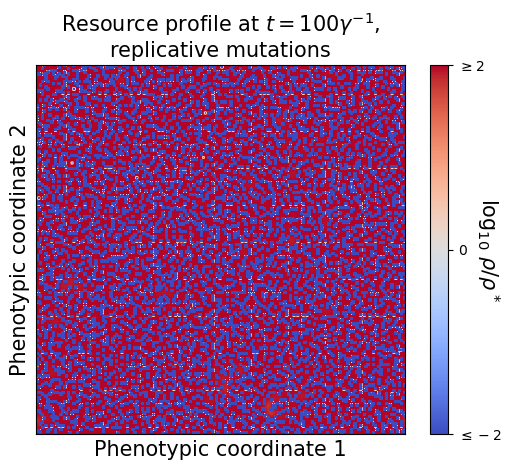

In [325]:
# plot resource profile

data = (np.log10(rs_non[-1]))
plt.imshow(data, interpolation='bilinear', vmin=-2, vmax=2, cmap='coolwarm')

ax = plt.gca()
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_yticklabels([])
ax.set_yticks([])


cbar = plt.colorbar(ticks=[-2, 0, 2])
cbar.ax.set_yticklabels(['$\\leq-2$', '0', '$\\geq 2$'])
cbar.set_label('log$_{10}$ ${\\rho}/{\\rho^*}$', rotation=270, fontsize=15, labelpad=1)

ax.set_xlabel('Phenotypic coordinate 1', fontsize=15)
ax.set_ylabel('Phenotypic coordinate 2', fontsize=15)
ax.set_title('Resource profile at $t=100\\gamma^{-1}$,\nreplicative mutations', fontsize=15)

plt.savefig('2d_replicative_resource.png', bbox_inches='tight', dpi=300)

In [329]:
# integrate exogenous equations

c = 2*np.random.rand(N, N)
r = 2*np.random.rand(N, N)

cs_exo = [copy.deepcopy(c)]
rs_exo = [copy.deepcopy(r)]

for n in range(n_steps):
    
    dcdt, drdt = derivative_exogenous(c, r)
    c += dt*dcdt
    r += dt*drdt
    if n%10000==0:
        cs_exo.append(copy.deepcopy(c))
        rs_exo.append(copy.deepcopy(r))

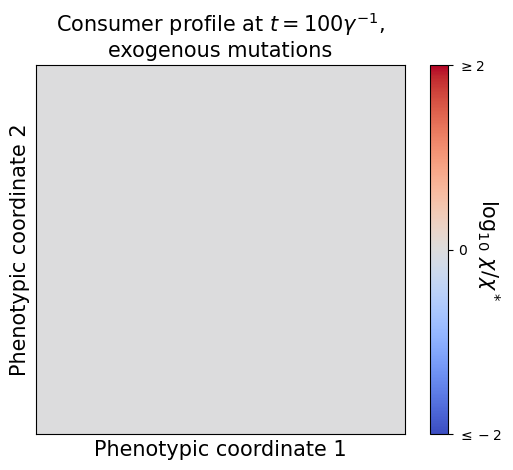

In [333]:
# plot consumer profile

data = np.log10(cs_lin[-1])

plt.imshow(data,  interpolation='bilinear', vmin=-2, vmax=2, cmap='coolwarm')

ax = plt.gca()
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

cbar = plt.colorbar(ticks=[-2, 0, 2])
cbar.ax.set_yticklabels(['$\\leq-2$', '0', '$\\geq 2$'])
cbar.set_label('log$_{10}$ ${\\chi}/{\\chi^*}$', rotation=270, fontsize=15, labelpad=1)

ax.set_xlabel('Phenotypic coordinate 1', fontsize=15)
ax.set_ylabel('Phenotypic coordinate 2', fontsize=15)
ax.set_title('Consumer profile at $t=100\\gamma^{-1}$,\nexogenous mutations', fontsize=15)

plt.savefig('2d_exogenous_consumer.png', bbox_inches='tight', dpi=300)

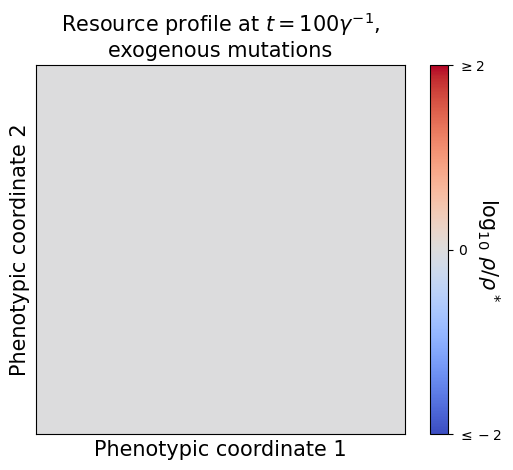

In [332]:
# plot resource profile

data = np.log10(rs_lin[-1])

plt.imshow(data,  interpolation='bilinear', vmin=-2, vmax=2, cmap='coolwarm')

ax = plt.gca()
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

cbar = plt.colorbar(ticks=[-2, 0, 2])
cbar.ax.set_yticklabels(['$\\leq-2$', '0', '$\\geq 2$'])
cbar.set_label('log$_{10}$ ${\\rho}/{\\rho^*}$', rotation=270, fontsize=15, labelpad=1)

ax.set_xlabel('Phenotypic coordinate 1', fontsize=15)
ax.set_ylabel('Phenotypic coordinate 2', fontsize=15)
ax.set_title('Resource profile at $t=100\\gamma^{-1}$,\nexogenous mutations', fontsize=15)

plt.savefig('2d_exogenous_resource.png', bbox_inches='tight', dpi=300)